# Testing Cosmological Computations 

This notebook illustrates the various background cosmology and power spectrum tools embedded in flowpm.

In [92]:
%pylab inline
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import flowpm.tfbackground as bkgrd
import flowpm.tfpower as power
# Importing CCL as a reference
import pyccl as ccl

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/usr/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['power']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [93]:
# Create a cosmology dictionary
# Plank 15 cosmology
cosmo={"w0":-1.0,
       "wa":0.0,
       "H0":100,
       "h":0.6774,
       "Omega0_b":0.04860,
       "Omega0_c":0.2589,
       "Omega0_m":0.3075,
       "Omega0_k":0.0,
       "Omega0_de":0.6925,
       "n_s":0.9667,
       "sigma8":0.8159}

cosmo_ccl = ccl.Cosmology(
        Omega_c=0.2589,
        Omega_b=0.0486,
        h=0.6774,
        sigma8=0.8159,
        n_s=0.9667,
        Neff=0,
        transfer_function="eisenstein_hu",
        matter_power_spectrum="linear",
    )

In [94]:
# Compute power spectrum with EH
k = np.logspace(-3,1)

pk = power.linear_matter_power(cosmo, k/ cosmo['h'], a=1, 
                               type='eisenhu_osc')/ cosmo['h'] ** 3
pk_ccl = ccl.linear_matter_power(cosmo_ccl, k, 1)

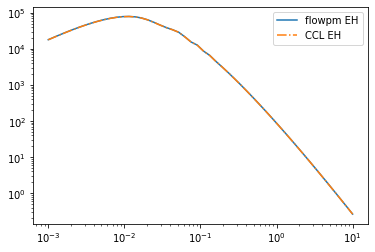

In [95]:
loglog(k, pk, label='flowpm EH')
loglog(k, pk_ccl, '-.', label='CCL EH')
legend()